In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
import matplotlib as mpl
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Arial'  # Arial 또는 다른 폰트로 변경
plt.rcParams['axes.unicode_minus'] = False  # 음수 기호 문제 해결
print(mpl.matplotlib_fname())
print(mpl.get_cachedir())
mpl.rcParams['font.family'] = 'NanumGothic'

C:\Users\autum\anaconda3\Lib\site-packages\matplotlib\mpl-data\matplotlibrc
C:\Users\autum\.matplotlib


In [3]:
file = r"C:\Users\autum\OneDrive\바탕 화면\2-2\통계적데이터분석\data\Student Attitude and Behavior.csv"
df = pd.read_csv(file)
df.head()

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree,social media & video,Travelling Time,Stress Level,Financial Status,part-time job
0,No,Male,BCA,100.0,58.0,79.0,64.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,71.0,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


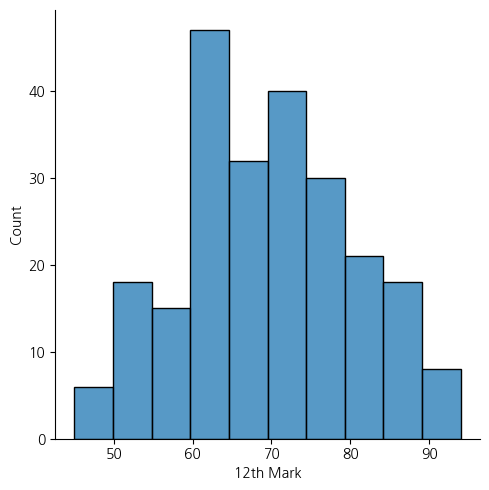

In [4]:
sns.displot(df['12th Mark'])

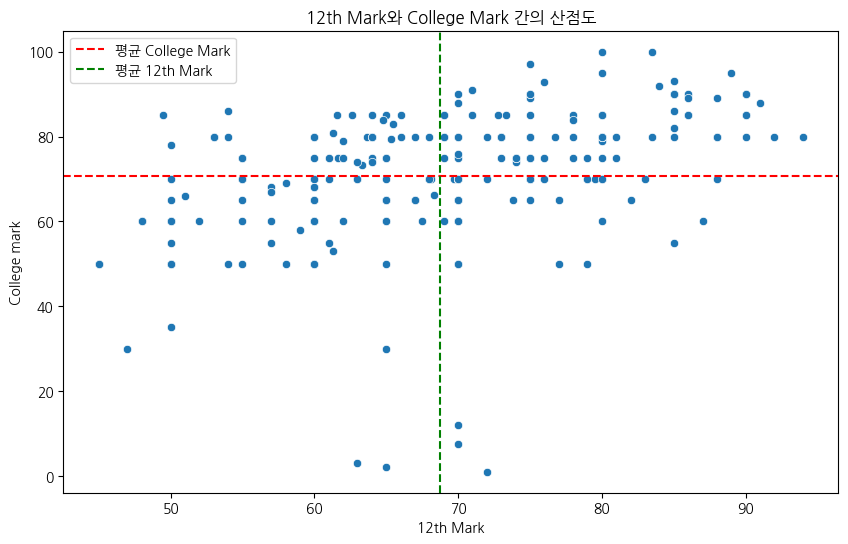

In [5]:
# 산점도 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(df, x='12th Mark', y='college mark')
plt.title("12th Mark와 College Mark 간의 산점도")
plt.xlabel("12th Mark")
plt.ylabel("College mark")
plt.axhline(y=df['college mark'].mean(), color='r', linestyle='--', label='평균 College Mark')
plt.axvline(x=df['12th Mark'].mean(), color='g', linestyle='--', label='평균 12th Mark')
plt.legend()
plt.show()


In [6]:
from scipy.stats import shapiro

shapiro_12th = shapiro(df['12th Mark'])
shapiro_college = shapiro(df['college mark'])
print(shapiro_12th)
print(shapiro_college)

# 정규성 없음

ShapiroResult(statistic=0.9843700313971336, pvalue=0.010990711180181965)
ShapiroResult(statistic=0.8794564874058373, pvalue=1.0398821738461247e-12)


In [7]:
from scipy.stats import levene

stat,p = levene(df["12th Mark"], df["college mark"])
print(stat, p)

# 분산이 동일하지 않음

7.490645794309788 0.0064380802829246886


In [8]:
from scipy.stats import kruskal

stat, p = kruskal(df["12th Mark"], df["college mark"])
print(stat, p)

# p < 0.05 이므로 귀무가설 기각 
# 12th Mark와 college mark 관계가 있다

8.327990511065039 0.0039038817767729555


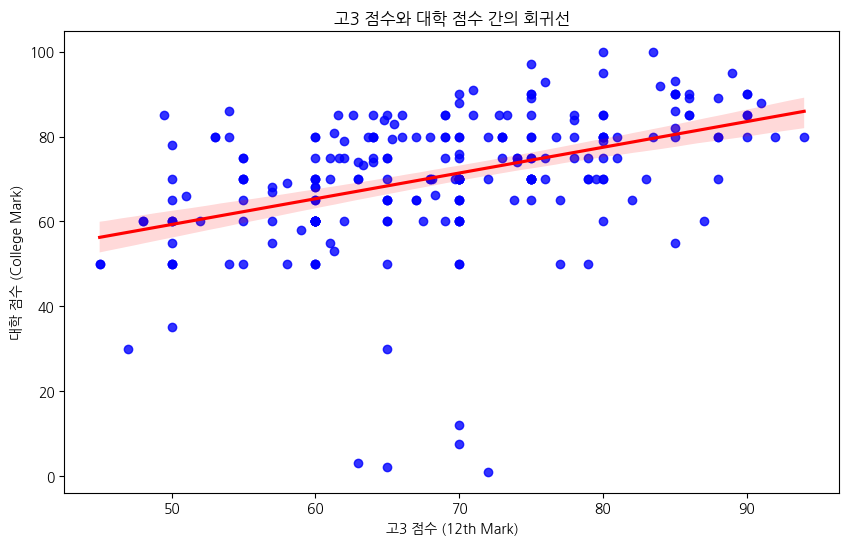

In [33]:
# regplot
plt.figure(figsize=(10, 6))
sns.regplot(x='12th Mark', y='college mark', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('고3 점수와 대학 점수 간의 회귀선')
plt.xlabel('고3 점수 (12th Mark)')
plt.ylabel('대학 점수 (College Mark)')
plt.show()

Text(0, 0.5, '대학 점수 (College Mark)')

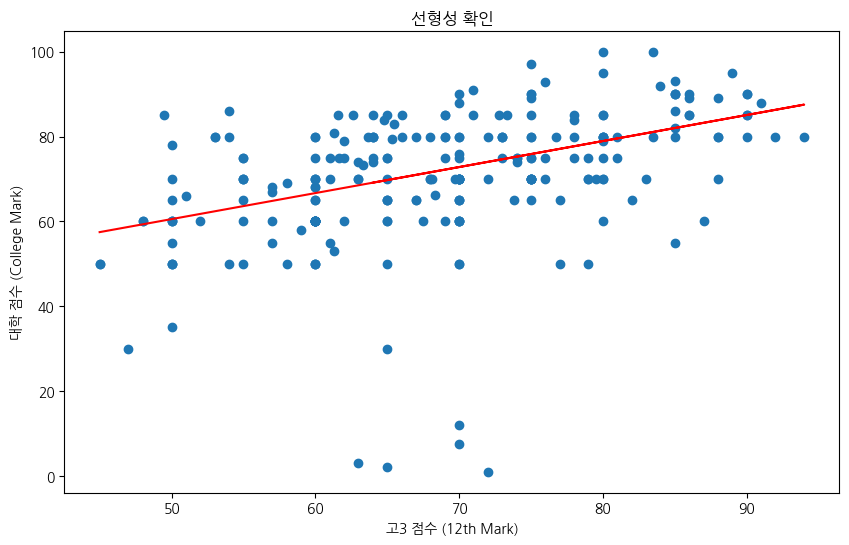

In [32]:
import statsmodels.api as sm
X = df['12th Mark']  # 독립 변수
y = df['college mark']  # 종속 변수

# 회귀 모델 적합
X = sm.add_constant(X)  # 절편 추가
model = sm.RLM(y, X).fit()
predictions = model.predict(X)
residuals = y - predictions

# 1. 선형성 확인
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 1], y, label='Observed Data')
plt.plot(X.iloc[:, 1], predictions, color='red', label='Fitted Line')
plt.title('선형성 확인')
plt.xlabel('고3 점수 (12th Mark)')
plt.ylabel('대학 점수 (College Mark)')

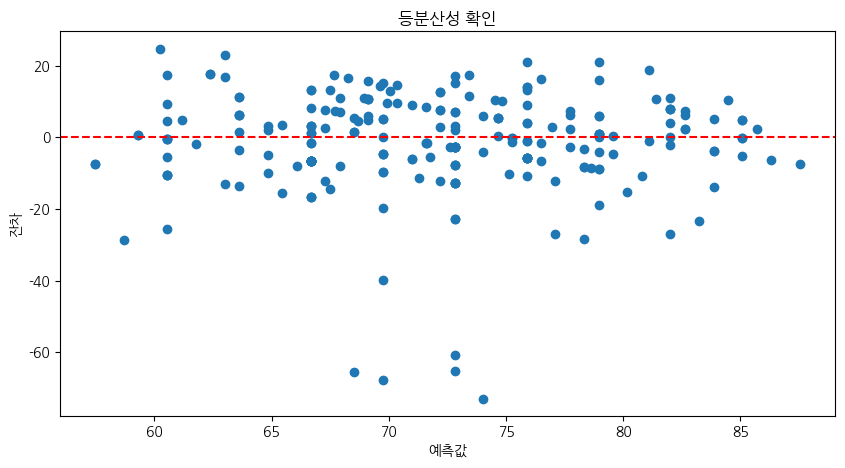

In [35]:
# 3. 등분산성 확인
plt.figure(figsize=(10, 5))
plt.scatter(predictions, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('등분산성 확인')
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.show()

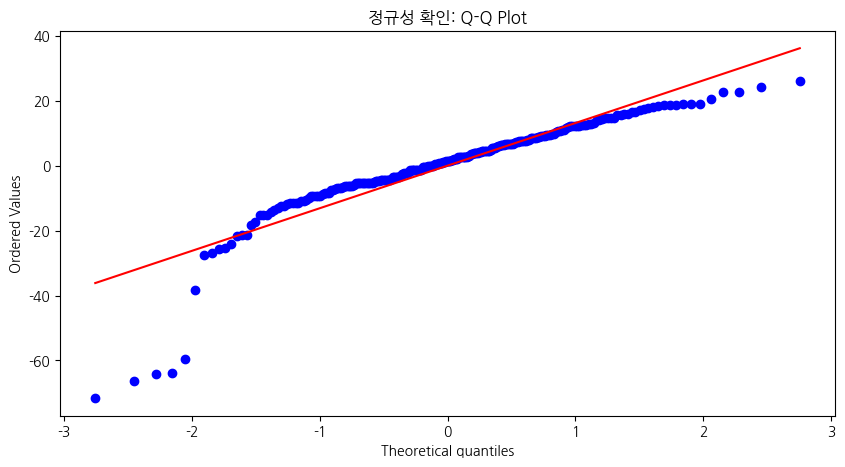

In [21]:

# 4. 정규성 확인
plt.figure(figsize=(10, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('정규성 확인")
plt.show()


In [13]:
import statsmodels.api as sm
# 회귀 분석
X = sm.add_constant(df['12th Mark'])  # 상수항 추가
model = sm.OLS(df['college mark'], X).fit()  # 회귀 모델 피팅

# 회귀 결과 출력
print(model.summary())

#정규성, 등분산성 만족하지 않으므로 OLS 사용하지 않고 RLM 사용

                            OLS Regression Results                            
Dep. Variable:           college mark   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     51.31
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           1.03e-11
Time:                        02:42:16   Log-Likelihood:                -957.08
No. Observations:                 235   AIC:                             1918.
Df Residuals:                     233   BIC:                             1925.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.9546      5.896      4.911      0.0

In [14]:
import statsmodels.api as sm
# 회귀 분석
X = sm.add_constant(df['12th Mark'])  # 상수항 추가
model = sm.RLM(df['college mark'], X).fit()  # 회귀 모델 피팅

# 회귀 결과 출력
print(model.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:           college mark   No. Observations:                  235
Model:                            RLM   Df Residuals:                      233
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 07 Dec 2024                                         
Time:                        02:42:16                                         
No. Iterations:                    15                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.8736      4.532      6.591      0.0